In [119]:
#pip install -r requirements.txt
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Đọc file nếu nó chỉ chứa 2 cột tọa độ
path='att48_xy.txt'
data = pd.read_csv(path, delim_whitespace=True, header=None).to_numpy()
print(data[:5])
print(data.shape)

[[6734 1453]
 [2233   10]
 [5530 1424]
 [ 401  841]
 [3082 1644]]
(48, 2)


                                            Initialization      

In [120]:
import math
def calculate_dist(node1, node2):
    # node1 và node2 là mảng [x, y]
    return math.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

In [121]:
def total_tour_distance(coords, tour_indices):
    total_dist = 0
    for i in range(len(tour_indices) - 1):
        node_a= coords[tour_indices[i]] # Lấy tọa độ của điểm hiện tại(data[tour_indices[i]]->data[0]=[x,y])
        node_b= coords[tour_indices[i + 1]]
        total_dist += calculate_dist(node_a, node_b)
    # Trả về khoảng cách từ điểm cuối về điểm đầu để hoàn thành chu trình
    return total_dist

In [122]:
#test random tour
def get_random_tour(coords):
    num_nodes = len(coords)
    indices = list(range(num_nodes))
    random.shuffle(indices)
    tour_indices = indices + [indices[0]]
    return tour_indices
# Tạo một hành trình ngẫu nhiên và tính khoảng cách(test)
random_tour = get_random_tour(data)
# tour=[1,13,2,15,9,5,7,3,12,14,10,8,6,4,11,1]
# trừ 1 để chuyển sang chỉ số bắt đầu từ 0
random_tour = [i - 1 for i in random_tour]
print(f"(thứ tự các node):")
print(random_tour)
print(f"Tổng khoảng cách hành trình: {total_tour_distance(data, random_tour)}")

(thứ tự các node):
[23, 5, 14, 24, 6, 7, 8, 2, 32, 10, 15, -1, 31, 35, 25, 29, 46, 45, 34, 43, 1, 21, 36, 41, 18, 12, 30, 39, 22, 42, 16, 38, 20, 33, 4, 0, 9, 28, 27, 37, 17, 13, 40, 3, 26, 11, 44, 19, 23]
Tổng khoảng cách hành trình: 172513.015760053


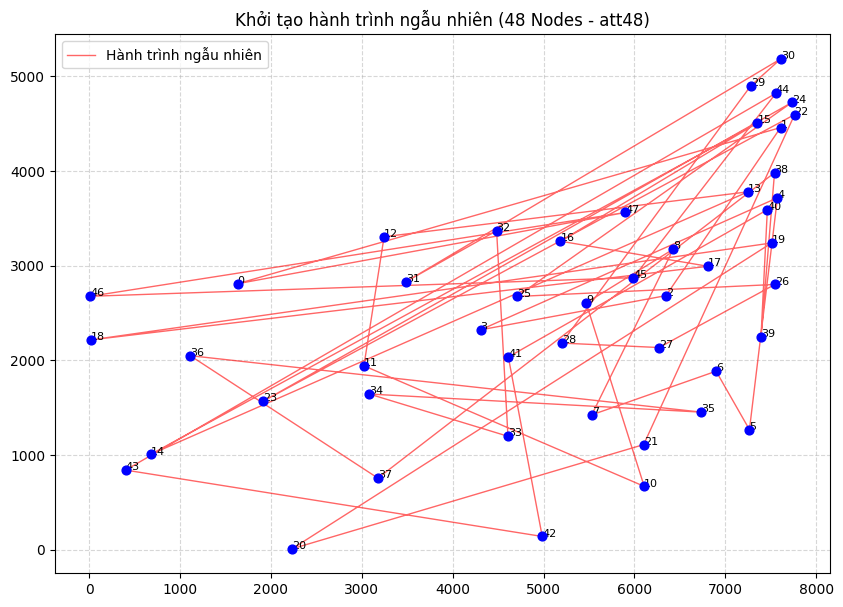

In [123]:
def plot_tour(coords, tour_indices):
    plt.figure(figsize=(10, 7))
    
    # Lấy tọa độ X và Y theo thứ tự của hành trình ngẫu nhiên
    ordered_coords = coords[tour_indices]
    
    # Vẽ các đường nối giữa các thành phố
    plt.plot(ordered_coords[:, 0], ordered_coords[:, 1], 'r-', alpha=0.6, linewidth=1, label='Hành trình ngẫu nhiên')
    
    # Vẽ các điểm thành phố
    plt.scatter(coords[:, 0], coords[:, 1], color='blue', s=40, zorder=5)
    
    # Đánh số thứ tự bốc thăm lên biểu đồ (tùy chọn)
    for i, idx in enumerate(tour_indices[:-1]):
        plt.annotate(f"{i}", (coords[idx, 0], coords[idx, 1]), fontsize=8)

    plt.title("Khởi tạo hành trình ngẫu nhiên (48 Nodes - att48)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

plot_tour(data, random_tour)

In [124]:

def create_population(size, nodes_count, coords_data):
    population = []
    for _ in range(size):
        tour=np.arange(nodes_count) # Tạo danh sách các chỉ số từ 0 đến nodes_count-1
        np.random.shuffle(tour) # Xáo trộn danh sách các chỉ số từ 0 đến nodes_count-1, tránh việc thuật toán bị hội tụ cục bộ quá sớm
        full_path = np.append(tour, tour[0]) # Thêm điểm đầu tiên vào cuối để hoàn thành hành trình( vòng tròn)
        dist = total_tour_distance(coords_data, full_path) 
        population.append({
            "path": full_path,
            "distance": dist
        })# Thêm cá thể vào quần thể
    return population
#test
population_size = 100
num_nodes = data.shape[0]# Số lượng node trong dữ liệu(48)
my_population = create_population(population_size, num_nodes, data)
# In kết quả quãng đường của 100 phương án(test)
print(f"--- Quãng đường của {population_size} phương án khởi tạo (test)---")
for i, ind in enumerate(my_population):
    print(f"Phương án {i+1}: {ind['distance']:.2f}")

--- Quãng đường của 100 phương án khởi tạo (test)---
Phương án 1: 161990.75
Phương án 2: 161156.54
Phương án 3: 154401.34
Phương án 4: 166732.02
Phương án 5: 142937.03
Phương án 6: 157831.76
Phương án 7: 159321.27
Phương án 8: 168334.47
Phương án 9: 165864.77
Phương án 10: 175356.73
Phương án 11: 149111.20
Phương án 12: 151521.80
Phương án 13: 161558.55
Phương án 14: 134080.12
Phương án 15: 159380.05
Phương án 16: 144378.52
Phương án 17: 150236.90
Phương án 18: 143589.16
Phương án 19: 154842.02
Phương án 20: 160618.37
Phương án 21: 160192.00
Phương án 22: 146050.27
Phương án 23: 159623.98
Phương án 24: 133196.07
Phương án 25: 153027.07
Phương án 26: 157506.28
Phương án 27: 163280.32
Phương án 28: 177309.91
Phương án 29: 157738.27
Phương án 30: 162678.62
Phương án 31: 155029.62
Phương án 32: 174892.49
Phương án 33: 134273.63
Phương án 34: 150521.50
Phương án 35: 167881.93
Phương án 36: 141768.82
Phương án 37: 185279.78
Phương án 38: 149339.81
Phương án 39: 168233.89
Phương án 40: 153901

                                Evaluation      

In [125]:
def sort_population_and_select_best_half(my_population):
    sorted_population = sorted(my_population, key=lambda x: x['distance']) # tăng dần theo quãng đường(distance)
# 2. cắt 50%
    cut = len(sorted_population) // 2
# 3. Lấy 50% tốt nhất (0->nửa danh sách đã sắp xếp)
    best_50_percent = sorted_population[:cut]
    return sorted_population, best_50_percent

#test sort and select
print("\n--- Sắp xếp và chọn 50% phương án tốt nhất(test) ---")
sorted_population, best_50_percent = sort_population_and_select_best_half(my_population)
print(f"Số lượng cá thể giữ lại: {len(best_50_percent)}")
print(f"Phương án tốt nhất có quãng đường: {sorted_population[0]['distance']:.2f}")
print("\nDanh sách quãng đường 50% tốt nhất:")
for ind in best_50_percent:
    print(f"{ind['path']}- {ind['distance']:.2f}")



--- Sắp xếp và chọn 50% phương án tốt nhất(test) ---
Số lượng cá thể giữ lại: 50
Phương án tốt nhất có quãng đường: 133196.07

Danh sách quãng đường 50% tốt nhất:
[41 20 11 42 33 31  3  6  1 34 44 40 35 26 24  8 22 38 37 17  5 45 32 30
 19 46 15 28  4 29 27 10 23  2  7 12 39 18 36 21 43 14  0 25 47 16 13  9
 41]- 133196.07
[42  6 11 23 38 17  4 31 19  1 43 30 22  8  0 18 26 13 37 36 10 34 40  2
 12 28 20  3 44 45 32 16 24 15 33 21 14 35  5  7  9 41 25 39 27 29 47 46
 42]- 134080.12
[20 46 41  3 44 22 34 18 35 37 10  1 14  0 36 38 33 21 11 43 24 47 25 31
 45 19 29  5  6 26 30  7  9 15 32 17  8 23 39 40  2 42 12  4 16 27 28 13
 20]- 134273.63
[29 24 19 45 43 26 33 37 14  5 32 18 41  8 10 27 22 21 17 36 42  7  1 34
 35 11 15 30 40 38 31  0  3 39 16 20  9 25 47  6 28 46 12  4 44 23  2 13
 29]- 141768.82
[ 1 39  0 42 11 37 26 46 10 35 15 12 28  9 13 23  7 44 30 21 25 14  8 19
 40 31 33 17 45 43  5 36 20  2 41 29 24  3 47 18 16 32  6 27 22  4 34 38
  1]- 142937.03
[30 23 31 43 22 40 13 41 3

                                Crossover & Mutation &Selection 
                                

In [126]:
def cycle_crossover(parent1_path, parent2_path):
    # Lấy n phần tử đầu (bỏ điểm quay về cuối cùng)
    p1=parent1_path[:-1]
    p2=parent2_path[:-1]
    n = len(p1)
    # Khởi tạo 2 con với giá trị rỗng (-1)
    child1 = np.full(n, -1, dtype=int)
    child2 = np.full(n, -1, dtype=int)
    # đánh dấu các phần tử đã thăm
    visited = np.zeros(n, dtype=bool)
    cycle_id = 0
    """
    i->current=0
    cycle_indices = []
    cycle_indices.append(0)
    visited[0]=True
    current_value_in_p2 = p2[0]=9
    current=np.where(p1 == current_value_in_p2)[0][0]=8
    
    Cha 1 (P1): [1, 2, 3, 4, 5, 6, 7, 8, 9] 
    Cha 2 (P2): [9, 3, 7, 8, 2, 6, 5, 1, 4]
    [0, 8, 3, 7] tạo thành chu trình 1( cycle_id = 0)(1-9-8-4-1)
    child1 lấy từ P1, child2 lấy từ P2
    c1=[1, -1, -1, 4, -1, -1, -1, 8, 9]
    c2=[9, -1, -1, 8, -1, -1, -1, 1, 4]
    [1, 2, 6, 4] tạo thành chu trình 2( cycle_id = 1)(2-3-7-5-2)
    c1 lấy từ P2, c2 lấy từ P1
    c1=[1, 3, 7, 4, 2, -1, 5, 8, 9]
    c2=[9, 2, 3, 8, 5, -1, 7, 1, 4]
    """
    for i in range(n):
        if not visited[i]:
            # Tìm một chu trình mới
            cycle_indices = []
            current = i
            while current not in cycle_indices:
                cycle_indices.append(current)
                visited[current]=True
                # Tìm chỉ số của phần tử tương ứng trong cha kia
                current_value_in_p2 = p2[current]
                current=np.where(p1 == current_value_in_p2)[0][0]
            # Sao chép xen kẽ các chu trình vào con( child1 và child2 lấy từ p1 và p2, cycle_id chẵn thì lấy từ p1, lẻ thì lấy từ p2 và ngược lại)
            if cycle_id % 2 == 0:
                child1[cycle_indices] = p1[cycle_indices]
                child2[cycle_indices] = p2[cycle_indices]
            else:
                child1[cycle_indices] = p2[cycle_indices]
                child2[cycle_indices] = p1[cycle_indices]
            cycle_id += 1
            
    # Khép kín vòng lặp cho các con
    full_c1 = np.append(child1, child1[0])
    full_c2 = np.append(child2, child2[0])
    return full_c1, full_c2

In [ ]:
def swap_mutation(path_indices, p_m=0.1):
    """Đột biến đổi chỗ 2 điểm """
    path = path_indices[:-1].copy() # Loại bỏ điểm cuối cùng (tý nữa lấy lại tạo thành 1 chu trình)
    
    if random.random() < p_m:
        # Chọn 2 vị trí bất kỳ và đổi chỗ
        # idx1, idx2 = random.sample(range(len(path)), 2)
        # path[idx1], path[idx2] = path[idx2], path[idx1]

        # Đảo đoạn 
        # chọn 2 chỉ số ngẫu nhiên, sắp xếp
        idx1, idx2 = sorted(random.sample(range(len(path)), 2))
        # Đảo đoạn giữa idx1 và idx2
        path[idx1:idx2] = path[idx1:idx2][::-1]#step = -1, nó sẽ đi từ cuối về đầu(start:end:step)
    return np.append(path, path[0])
  
        
        # test = np.append(path, path[0])
        # if(total_tour_distance(data, test) > total_tour_distance(data, path_indices)):  
        #     return path_indices (Greedy)

In [128]:
def selection_elitism(combined_population, n_size):
    """Chọn lọc Elitism: Giữ lại n cá thể tốt nhất """
    # Sắp xếp theo quãng đường tăng dần
    sorted_pop = sorted(combined_population, key=lambda x: x['distance'])
    # Trả về n_size cá thể đứng đầu(slicing)
    return sorted_pop[:n_size]

In [129]:
def breed_population(parent_pop, coords_data, p_c=0.7):
    offspring_pop = []
    # Xáo trộn danh sách cha mẹ để chọn cặp ngẫu nhiên
    random.shuffle(parent_pop)
    # Chia cặp (ví dụ: cá thể 0 lai với 1, 2 lai với 3...)
    # chia ra từng cặp để lai tạo(đỡ tốn bộ nhớ)
    for i in range(0, len(parent_pop) - 1, 2):
        parent1 = parent_pop[i]
        parent2 = parent_pop[i+1]
        if random.random() < p_c:
            # Thực hiện lai ghép nếu xác suất nhỏ hơn p_c
            c1_path, c2_path = cycle_crossover(parent1['path'], parent2['path'])
            # Tính quãng đường và thêm vào danh sách con
            offspring_pop.append({"path": c1_path, "distance": total_tour_distance(coords_data, c1_path)})
            offspring_pop.append({"path": c2_path, "distance": total_tour_distance(coords_data, c2_path)})
        else:
            # Nếu không lai, giữ nguyên cha mẹ làm con (hoặc tạo bản sao)
            offspring_pop.append(parent1.copy())
            offspring_pop.append(parent2.copy())
    return offspring_pop


In [130]:
N = 500          # Kích thước quần thể
generations = 500  # Số thế hệ
p_c = 0.9      # Xác suất lai ghép
p_m = 0.1   # Xác suất đột biến(0.08-0.1)
"""
Lai ghép tạo đời con (offspring)
Đột biến và Đánh giá lại (ind)
Đấu tranh sinh tồn (Selection)
"""
#  Khởi tạo quần thể ban đầu (P0) 
current_pop = sort_population_and_select_best_half(create_population(N*5, num_nodes, data))[1] # best_50_percent lấy quần thể tốt nhất(theo distance)
history_best = []
history_best_path=[]
print("Bắt đầu tiến hóa...")

for gen in range(generations):
    # Lai ghép tạo quần thể con(offspring)
    offspring = breed_population(current_pop, data, p_c)
     
    #  Đột biến các cá thể con và Đánh giá lại (ind)
    for ind in offspring:
        ind['path'] = swap_mutation(ind['path'], p_m)
        ind['distance'] = total_tour_distance(data, ind['path'])
        
    # Chọn lọc sinh tồn 
    # Gộp cha mẹ và con lại rồi chọn N cái tốt nhất
    combined = current_pop + offspring
    current_pop = selection_elitism(combined, N)
    
    # Lưu lại kết quả tốt nhất thế hệ này để theo dõi
    best_dist = current_pop[0]['distance']# Quãng đường tốt nhất hiện tại(float)
    history_best.append(best_dist)
    best_path = current_pop[0]['path'] # Lộ trình tốt nhất hiện tại(array)
    history_best_path.append(best_path)
    if (gen + 1) % 10 == 0:
        print(f"Thế hệ {gen+1}: Quãng đường ngắn nhất = {best_dist:.2f}")

print(f"Quãng đường đã giảm từ {history_best[0]:.2f} xuống còn {history_best[-1]:.2f}")

Bắt đầu tiến hóa...
Thế hệ 10: Quãng đường ngắn nhất = 108199.22
Thế hệ 20: Quãng đường ngắn nhất = 96198.61
Thế hệ 30: Quãng đường ngắn nhất = 89577.23
Thế hệ 40: Quãng đường ngắn nhất = 80599.92
Thế hệ 50: Quãng đường ngắn nhất = 76407.47
Thế hệ 60: Quãng đường ngắn nhất = 67251.65
Thế hệ 70: Quãng đường ngắn nhất = 64736.72
Thế hệ 80: Quãng đường ngắn nhất = 62047.10
Thế hệ 90: Quãng đường ngắn nhất = 59747.27
Thế hệ 100: Quãng đường ngắn nhất = 59183.15
Thế hệ 110: Quãng đường ngắn nhất = 57602.68
Thế hệ 120: Quãng đường ngắn nhất = 56966.42
Thế hệ 130: Quãng đường ngắn nhất = 55634.44
Thế hệ 140: Quãng đường ngắn nhất = 53575.36
Thế hệ 150: Quãng đường ngắn nhất = 53336.15
Thế hệ 160: Quãng đường ngắn nhất = 52472.96
Thế hệ 170: Quãng đường ngắn nhất = 52472.96
Thế hệ 180: Quãng đường ngắn nhất = 52394.66
Thế hệ 190: Quãng đường ngắn nhất = 51447.29
Thế hệ 200: Quãng đường ngắn nhất = 51447.29
Thế hệ 210: Quãng đường ngắn nhất = 50387.29
Thế hệ 220: Quãng đường ngắn nhất = 50387.2

In [131]:
with open("du_lieu.txt", "a", encoding="utf-8") as f:
    f.write(str(history_best[-1]))
    f.write(str(history_best_path[-1]))
print(history_best[-1])
print(history_best_path[-1])

39367.22522439583
[46 20 12 24 38 31 44 34  3 25 41  9 23 47  4  1 28 33 13 22 10  2 40 15
 21  7  8 39 14  0 37 30 45 43 17  6 27  5 18 36 26 16 42 29 35 32 11 19
 46]


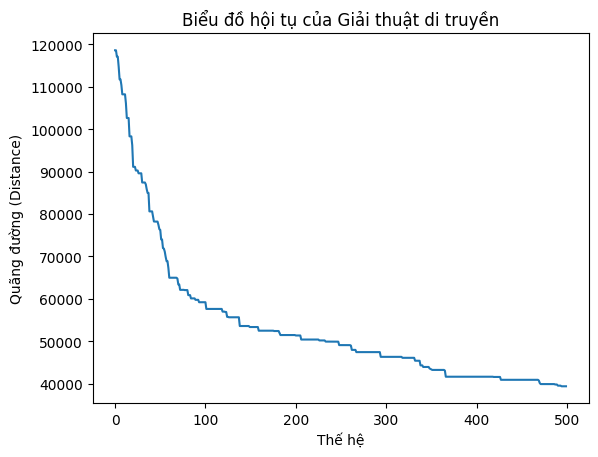

In [132]:
import matplotlib.pyplot as plt

plt.plot(history_best)
plt.title("Biểu đồ hội tụ của Giải thuật di truyền")
plt.xlabel("Thế hệ")
plt.ylabel("Quãng đường (Distance)")
plt.show()